## 평가 지표

### 1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
 - MSE 손실함수값 3000 이하를 달성 (O)

### 2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
 - RMSE 값 150 이하를 달성(O)

### 3. 시각화 요구사항이 정확하게 이루어졌는가?
 - 각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다. (O)

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 당뇨병 수치(프로젝트 1)

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [122]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [8]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [96]:
df_X = diabetes.data
df_y = diabetes.target

In [95]:
'''
df_X = pd.DataFrame(df_X)
df_X.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
df_X
'''

"\ndf_X = pd.DataFrame(df_X)\ndf_X.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']\ndf_X\n"

In [94]:
'''
df_y = pd.DataFrame(df_y)
df_y.columns = ['label']
df_y
'''

"\ndf_y = pd.DataFrame(df_y)\ndf_y.columns = ['label']\ndf_y\n"

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=32)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [133]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [134]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [135]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [136]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    
    return dW, db

In [146]:
learning_rate = [0.001, 0.01, 0.1, 0.5, 1]

In [138]:
dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [ 0.00092031  0.01704485 -0.01181957 -0.01312936  0.02966399 -0.02088904
 -0.00190183  0.00940409 -0.03633085  0.0334514 ]
db: -4.6695442826910136e-05


Iteration 500 : Loss 9248.5595
Iteration 1000 : Loss 6465.9066
Iteration 1500 : Loss 6056.1795
Iteration 2000 : Loss 5967.4779
Iteration 2500 : Loss 5922.6624
Iteration 3000 : Loss 5884.2934
Iteration 3500 : Loss 5847.3053
Iteration 4000 : Loss 5811.0052
Iteration 4500 : Loss 5775.2909
-----------------<learning rate :  0.001 >------------------------------------
Iteration 500 : Loss 5743.4355
Iteration 1000 : Loss 5420.0980
Iteration 1500 : Loss 5143.3953
Iteration 2000 : Loss 4905.9426
Iteration 2500 : Loss 4701.5627
Iteration 3000 : Loss 4525.0864
Iteration 3500 : Loss 4372.1866
Iteration 4000 : Loss 4239.2385
Iteration 4500 : Loss 4123.2041
-----------------<learning rate :  0.01 >------------------------------------
Iteration 500 : Loss 4019.9495
Iteration 1000 : Loss 3456.2881
Iteration 1500 : Loss 3230.8023
Iteration 2000 : Loss 3112.5863
Iteration 2500 : Loss 3042.9425
Iteration 3000 : Loss 2999.9951
Iteration 3500 : Loss 2972.9026
Iteration 4000 : Loss 2955.5366
Iteration 4500

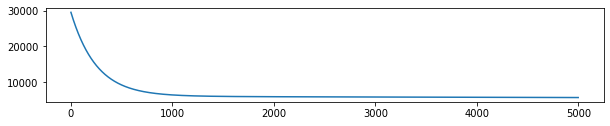

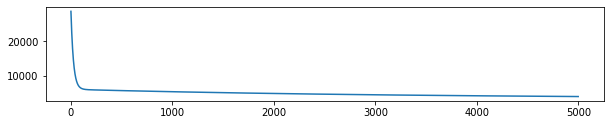

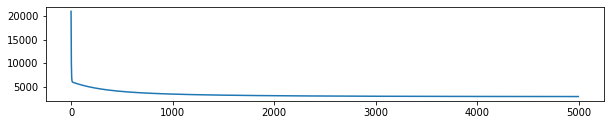

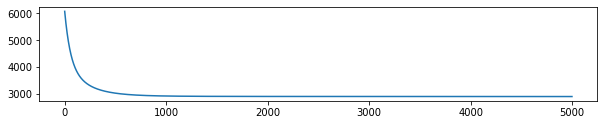

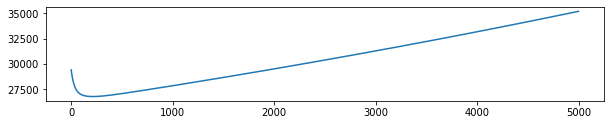

In [151]:
w = []
bb = []
a=1

for l_rate in learning_rate:
    
    W = np.random.rand(10)
    b = np.random.rand()
    losses = []
    
    for i in range(1, 5000):
        dW, db = gradient(X_train, W, b, y_train)
        W -= l_rate * dW
        b -= l_rate * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)
        if i % 500 == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))
    w.append(W)
    bb.append(b)
    plt.figure(figsize=(10,10))
    plt.subplot(5, 1, a)
    plt.plot(losses)
    a+=1
    print("-----------------<learning rate : ",l_rate, ">------------------------------------")
    
plt.show()

learning rate의 값에 따라 오차율의 차이를 볼 수 있다.

In [157]:
error = []
predicte = []
for i in range(5):
    prediction = model(X_test, w[i], bb[i])
    predicte.append(prediction)
    mse = loss(X_test, w[i], bb[i], y_test)
    error.append(mse)
    
print(error)

[4795.970165471659, 3404.0580205579713, 2795.914104239782, 2796.9964212568293, 38710.77307438795]


모델을 적용했을때 learning rate가 0.1이 2795.914104239782로 error값이 가장 적다

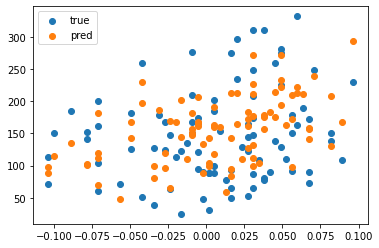

In [160]:
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], predicte[2], label='pred')
plt.legend()
plt.show()

learning rate가 0.1인 모델 예측값과 실제 값 비교

In [131]:
from sklearn.linear_model import LinearRegression

mod = LinearRegression()

In [132]:
mod.fit(X_train, y_train)
pred = model.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
mse

2787.6715824467237

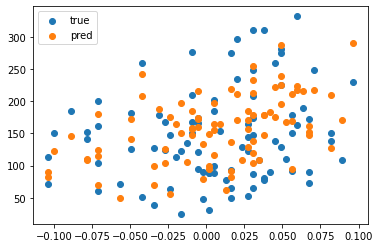

In [126]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], pred, label="pred")
plt.legend()
plt.show()

선형회귀 모델 구현 error : 2795.914104239782<br/>
sklearn.linear_model error : 2787.6715824467237<br/>

사이킷런의 모델이 수치가 조금 더 좋지만 거의 비슷한 것을 볼 수 있다.

하이퍼 파라미터를 어떻게 설정하느냐에 따라 오차율이 변하는 것을 보고 적절한 하이퍼 파라미터를 찾는 것의 중요성을 느끼게 되었다.

---

## 자전거 대여량(프로젝트 2)

In [3]:
csv_file_path = os.getenv('HOME')+'/data/data/bike-sharing-demand/train.csv'

In [4]:
data = pd.read_csv(csv_file_path)

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M', errors='raise')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['min'] = data['datetime'].dt.minute
data['sec'] = data['datetime'].dt.second

In [10]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


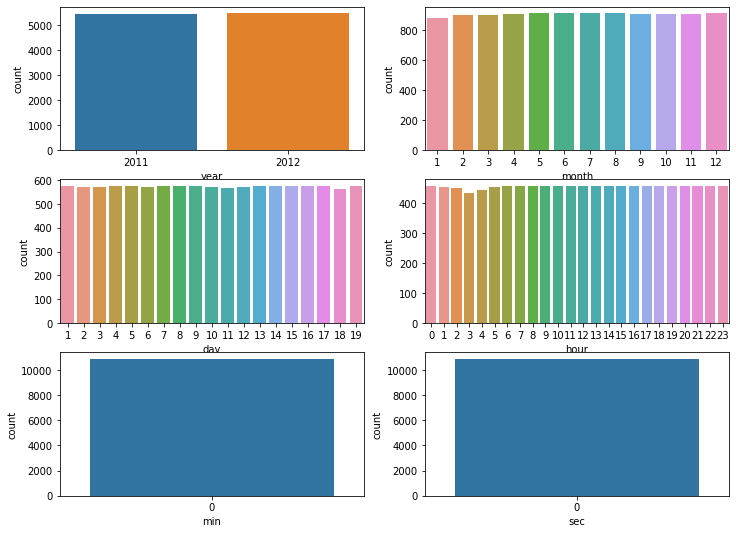

In [11]:
plt.figure(figsize=(12,9))
plt.subplot(3,2,1)
sns.countplot(x="year", data=data)

plt.subplot(3,2,2)
sns.countplot(x="month", data=data)

plt.subplot(3,2,3)
sns.countplot(x="day", data=data)

plt.subplot(3,2,4)
sns.countplot(x="hour", data=data)

plt.subplot(3,2,5)
sns.countplot(x="min", data=data)

plt.subplot(3,2,6)
sns.countplot(x="sec", data=data)
plt.show()

min과 sec는 하나의 값만 가지고 있기에 제외하기로 판단하였다.

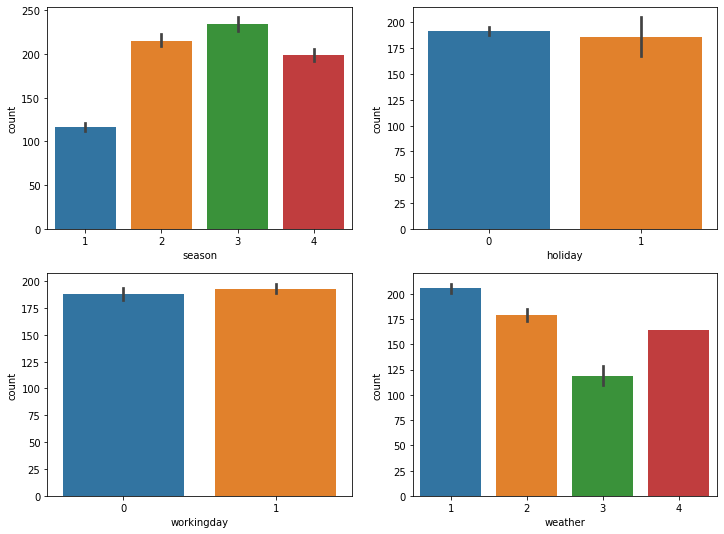

In [12]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
ax = sns.barplot(x='season',y='count',data=data)

plt.subplot(2,2,2)
ax = sns.barplot(x='holiday',y='count',data=data)

plt.subplot(2,2,3)
ax = sns.barplot(x='workingday',y='count',data=data)

plt.subplot(2,2,4)
ax = sns.barplot(x='weather',y='count',data=data)

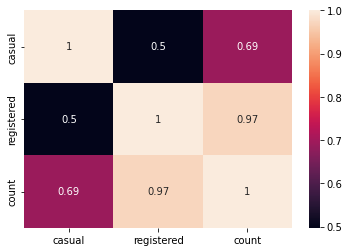

In [13]:
passengers = pd.concat([data["casual"],data["registered"],data["count"]], axis=1)
sns.heatmap(passengers.corr(), annot = True)

plt.show()

상관관계에서 낮은 숫자는 아니지만 casual과 registered는 count안에 있다고 생각하여 제외하기로 판단하였다.

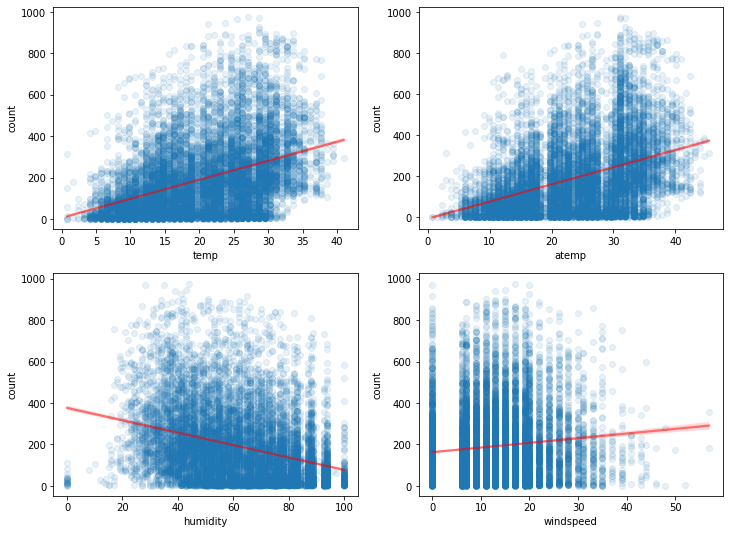

In [78]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
ax = sns.regplot(x='temp',y='count',data=data, scatter_kws={"alpha":0.1},
                 line_kws={"color":"r","alpha":0.5})

plt.subplot(2,2,2)
ax = sns.regplot(x='atemp',y='count',data=data, scatter_kws={"alpha":0.1},
                 line_kws={"color":"r","alpha":0.5})

plt.subplot(2,2,3)
ax = sns.regplot(x='humidity',y='count',data=data, scatter_kws={"alpha":0.1},
                 line_kws={"color":"r","alpha":0.5})

plt.subplot(2,2,4)
ax = sns.regplot(x='windspeed',y='count',data=data, scatter_kws={"alpha":0.1},
                 line_kws={"color":"r","alpha":0.5})

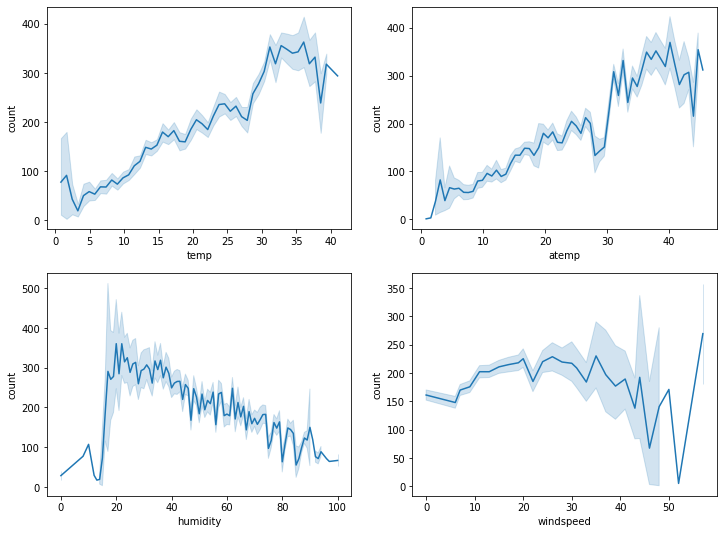

In [14]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
ax = sns.lineplot(x='temp',y='count',data=data)

plt.subplot(2,2,2)
ax = sns.lineplot(x='atemp',y='count',data=data)

plt.subplot(2,2,3)
ax = sns.lineplot(x='humidity',y='count',data=data)

plt.subplot(2,2,4)
ax = sns.lineplot(x='windspeed',y='count',data=data)

humidity와 windspeed는 신뢰구간이 크므로 제외하기로 판단하였다.

In [15]:
def ModZscore(data, threshold=3.5):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    
    mod_z_scores = 0.6745 * (data - median) / mad
    
    outlier = np.abs(mod_z_scores) > threshold
    
    return outlier

train 요소에서 casual, registered, humidity, windspeed, min, sec를 제외하여 진행한다.<br/>
datetime 또한 요소별로 나누었기에 제외한다.

In [56]:
X = data[["season", 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'year', 'month', 'day', 'hour']]
y = data[["count"]]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

print("X_train : ", len(X_train), " X_test : ", len(X_test))
print("y_train : ", len(y_train), " y_test : ", len(y_test))

X_train :  8708  X_test :  2178
y_train :  8708  y_test :  2178


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
pred = model.predict(X_test)

In [69]:
def mse(a, b):
    error = np.mean((a - b) ** 2)
    return error

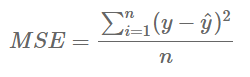

In [46]:
def rmse(a, b):
    error = np.sqrt(np.mean((a - b) ** 2))
    return error

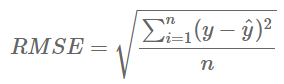

In [50]:
data_mse = mse(y_test, pred)
data_rmse = rmse(y_test, pred)

In [48]:
print("MSE 값 : ",data_mse,"\nRMSE 값 : ",data_rmse)

MSE 값 :  count    20685.264798
dtype: float64 
RMSE 값 :  count    143.823728
dtype: float64


RMSE 값 150이하 성공

---
### <추가>
Weather = 4이면 가장 날씨가 안좋은 날인데 2나 3보다 count값이 높은 것이 이상하여 weather = 4인 값을 제거하고 다시 해본다.

In [62]:
data = data[data['weather'] != 4]

In [63]:
X = data[["season", 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'year', 'month', 'day', 'hour']]
y = data[["count"]]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

print("X_train : ", len(X_train), " X_test : ", len(X_test))
print("y_train : ", len(y_train), " y_test : ", len(y_test))

X_train :  8708  X_test :  2177
y_train :  8708  y_test :  2177


In [65]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [68]:
data_mse = mse(y_test, pred)
data_rmse = rmse(y_test, pred)
print("MSE 값 : ",data_mse,"\nRMSE 값 : ",data_rmse)

MSE 값 :  count    20724.031075
dtype: float64 
RMSE 값 :  count    143.958435
dtype: float64


Weather = 4를 제외하니 오히려 143.82 -> 143.95로 RMSE값이 증가하였다.<br/>
분명 이상치라고 생각하였는데 왜 손실율이 늘어난지 모르겠다.

## 회고

 - 하이퍼 파라미터의 중요성과 손실함수를 이용한 손실율 계산을 알게되었다.<br/>
 - 데이터를 가지고 방향성을 잡고 원하는 데이터로 가공을 하고 데이터 시각화를 이용하여 데이터의 문제점(이상치 등)을 파악하고 데이터들의 관계를 찾아내어 학습에 최적으로 만드는 EDA 부분이 중요한 것을 느꼈다.
 - 데이터에서 무엇부터 만져야할지 헤매었지만 실습을 통해 조금이나마 방향을 느낀 듯 하다.
 - 여러 실습을 통해 스킬을 늘려나가야겠다는 생각이 들었다.